# **Week 9: Advanced Model Topics**
---

### **Description**
In this lab, you will gain experience with feature scaling through standardization and normalization. You'll also gain experience with different feature encoding techniques. You'll get to see firsthand how K-Folds Cross Validation aids in estimating the skill of ML models.

<br>

### **Structure**
**Part 1**: [Investigating Scaling](#p1)

**Part 2**: [Investigating Feature Encoding](#p2)

**Part 3**: [Feature Selection](#p3)

**Part 4**: [K-Folds Cross Validation](#p4)





<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how to implement standardization and normalization for feature scaling.

* Recognize how to implement various feature encoding techniques.

* Recognize how to implement `SelectKBest()`.


<br>

### **Resources**
* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1rKyjjnRe5dq3StxXS03n6iXfJvTN7dJNJjWVGdCu6cM/edit?usp=sharing)

* [pandas Commands](https://docs.google.com/document/d/1pLCyzig38Mop0Iib021X47S25WBEqZCWf7LRdpC8hGw/edit?usp=drive_link)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1tCKyB_E2A-S_rwTIN6JHE9lCQiK4DLTQTt25Lc-uQcs/edit?usp=drive_link)

- [Feature Engineering Cheat Sheet](https://docs.google.com/document/d/1M_iH8cs1bT_oKjnxW3hwZtCd9jsY77bFuP0Dp1-HLsU/edit?usp=drive_link)

- [Feature Scaling and K-Folds Cheat Sheet](https://docs.google.com/document/d/1094ZynyoNjaz3Dg8KP8wI-_uot2et1ZlEluck0JuQHQ/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 17.4 MB/s eta 0:00:0000:0100:01


<a name="p1"></a>

---
## **Part 1: Investigating Scaling**
---

In this section, we will investigate the role that no scaling versus standardization versus normalization can have on a model's performance. Specifically, we will use a 5NN to predict the type of crop that will grow the most successfully in a given set of conditions.

**Run the cell below to load and view the data frame we will be using this section.**

In [ ]:
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/crop_recommendation/crop%20recommendation%20clean.csv'
df = pd.read_csv(url)

df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### **Problem #1.1**

Define the features and label given that we are attempting to predict the type of crop based on environmental conditions.

In [19]:
!pip install pandas 
import pandas as df

features = df.drop(columns='crop') # COMPLETE THIS CODE
label = df['crop'] # COMPLETE THIS CODE

AttributeError: module 'pandas' has no attribute 'drop'

#### **Problem #1.2**

Split the data into training and test sets such that 20% of the data is reserved for testing.

In [22]:
!pip install features
import features

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = .2, random_state= 42) # COMPLETE THIS CODE

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(<module 'features' from '/srv/conda/envs/notebook/lib/python3.10/site-packages/features/__init__.py'>,
      dtype=object)` instead.

#### **Problem #1.3**

Now, create a *standardized* version of the training and testing data using sklearn's `StandardScaler()`. We will use this to compare to the original training and test sets.

In [27]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)# COMPLETE THIS CODE
X_test_std = std_scaler.fit(X_test) # COMPLETE THIS CODE

NameError: name 'X_train' is not defined

#### **Problem #1.4**

Now, create a *normalized* version of the training and testing data using sklearn's `MinMaxScaler()`. We will use this to compare to the original training and test sets and to the standardized versions.

In [23]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform( X_train)# COMPLETE THIS CODE
X_test_norm = norm_scaler.fit(X_test) # COMPLETE THIS CODE

NameError: name 'X_train' is not defined

#### **Problem #1.5**

Now it's time to model our data. Specifically, create KNN models as follows:

1. Modeling with the original, unscaled training data and testing on the test set using the accuracy and confusion matrix.

2. Modeling with the *standardized* training data and testing on the test set using the accuracy and confusion matrix.

3. Modeling with the *normalized* training data and testing on the test set using the accuracy and confusion matrix.

##### **1. Create a 5NN model with the original, unscaled training data and test it on the test set using a accuracy and confusion matrix.**

In [25]:
model_unscaled = # COMPLETE LINE

model_unscaled.fit(# COMPLETE LINE


pred_unscaled = model_unscaled.# COMPLETE LINE

print(accuracy_score(y_test, pred_unscaled))

SyntaxError: invalid syntax (2288139158.py, line 1)

In [24]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)

plt.show()

NameError: name 'y_test' is not defined

##### **2. Create a 5NN model with the *standardized* training data and test it on the test set using a accuracy and confusion matrix.**

In [26]:
model_std = KNeighborsClassifier(n_neighbors= 5)# COMPLETE THIS CODE

model_std.fit(X_train, y_train)# COMPLETE THIS CODE

pred_std = model_std.predicted(X_test) # COMPLETE THIS CODE

print(accuracy_score(y_test, pred_std))# COMPLETE THIS CODE

NameError: name 'X_train' is not defined

In [ ]:
# COMPLETE THIS CODE

##### **3. Create a 5NN model with the *normalized* training data and test it on the test set using a accuracy and confusion matrix.**

In [28]:
model_norm = KNeighborsClassifier(n_neighbors = 5)

model_norm. fit(X_train_norm, y_train)
pred_norm = model_norm.predict(X_test_norm)
print(accuracy_score(y_test, pred_norm))
# COMPLETE THIS CODE

# COMPLETE THIS CODE

NameError: name 'X_train_norm' is not defined

In [ ]:
# COMPLETE THIS CODE

#### **Reflection questions**
Answer the following questions:

1. Which of the three models had the highest performance?

2. Which of the three models had the lowest performance?

3. For the highest performing model, what two classes did it struggle with the most according to the f1-score.

4. Using the confusion matrix, can you explain what the model may be struggling with for these two classes?

5. What might this struggle to identify these two classes reveal about them?

<a name="p2"></a>

---
## **Part 2: Investigating Feature Encoding**
---

In this section, we will investigate the role that different forms of encoding have on a model's performance. Specifically, we will use KNN to predict a high school student's final grade according to a discrete category of 0 - 20. This dataset contains many features, as described below:

* `Medu` : Mother's education status. 'none' for no education, 'primary' for through 4th grade, 'middleschool' for through 9th grade, 'highschool' for through 12th grade, 'higher' for anything over 12th grade.
* `Fedu`: Father's education status. Same categories as `Medu`.
* `failures`: How many classes the student has failed in the past.
* `absences`: The number of days the student has been absent.
* `traveltime`: How many minutes the student has to travel to get to school.
* `goout`: How the student has rated how often they go out with friends on a scale from 1 (very low) to 5 (very high).
* `school`: `GP` or `MS` are two different schools in Portugal where the data was collected.
* `higher`: Whether the student has expressed interested in taking higher education after graduating high school.
* `famsize`: `GT3` for greater than 3 family members and `LE3` for less than or equal to 3 family members.
* `G3`: The overall grade of the student at the end of the year.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/student_portugal/student-por.csv'
df = pd.read_csv(url)

edu_map = {0: 'none', 1: 'primary', 2: 'middleschool', 3: 'highschool', 4: 'higher'}
df['Medu'] = df['Medu'].map(edu_map)
df['Fedu'] = df['Fedu'].map(edu_map)

df['traveltime'] *= 15
df['studytime'] *= 2.5

selected_features = [
    'Medu',            # Mother's Education
    'Fedu',            # Father's Education
    'failures',        # Number of class failures
    'absences',        # Number of absences
    'traveltime',      # Travel time to school
    'goout',           # Going out with friends
    'school',       # School identifier
    'higher',      # Interest in higher education
    'famsize',      # Family size ≤ 3 members
    'G3'
]

df = df[selected_features]

df.head()

,Medu,Fedu,failures,absences,traveltime,goout,school,higher,famsize,G3
0,higher,higher,0,4,30,4,GP,yes,GT3,11
1,primary,primary,0,2,15,3,GP,yes,GT3,11
2,primary,primary,0,6,15,2,GP,yes,LE3,12
3,higher,middleschool,0,0,15,2,GP,yes,GT3,14
4,highschool,highschool,0,0,15,2,GP,yes,GT3,13


### **Problem #2.1**

Just like with scaling, we must first split our training and test data *before* encoding to ensure there is no possible way for information to be exchanged between the training and test sets.

In particular, use `G3` as the label and split the data using the conventional 80/20 train/test split.

In [ ]:
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

### **Problem #2.2**

To motivate why we need encodings, attempt training a KNN model on the raw training set below.

In [ ]:
from sklearn.neighbors import KNearestNeighbors
model = KNearestNeighbors(k = 5)

model.fit(# COMPLETE THIS LINE

### **Problem #2.3**


Now, let's encode our categorical variables based on the type of variable they are,

1. First, create a a version of `X_train` and `X_test` that only uses the numerical varibles from our dataset.

2. Then, determine which categorical variables are ordered and which are unordered.

3. Encode the ordered categorical variables using the ordinal encoder.

4. Encode the unordered categorical variables using one hot encoding (dummy variable).

<br>

**Run the cell below to see the subset of all categorical (`object` type) columns in this data frame.**

In [32]:
columns_to_encode = df.select_dtypes(include = object).columns

print(columns_to_encode)

AttributeError: module 'pandas' has no attribute 'select_dtypes'

#### **1. Create a version of `X_train` and `X_test` where the unencoded categorical variables are just dropped.**

In [34]:
X_train_drop = X_train.drop(columns = columns_to_encode)# COMPLETE THIS LINE
X_test_drop = X_test.drop(columns = columns_to_encode) # COMPLETE THIS LINE

X_train_drop.head()

NameError: name 'X_train' is not defined

#### **2. Determine which categorical variables are ordered and which are unordered and create two lists that contain the feature names.**

In [ ]:
ordered_features = # COMPLETE THIS CODE
unordered_features = # COMPLETE THIS CODE

#### **3. Encode the ordered categorical variables using the ordinal encoder.**
**NOTE**: We must make copies of the dropped training and test sets using `.copy()` so that we can add the encoded columns without having to drop the original columns.

In [35]:
X_train_enc = X_train_drop.copy()
X_test_enc = X_test_drop.copy()


ord_enc = OrdinalEncoder()

X_train_enc[ordered_features] = ord_enc.fit_transform(X_train[ordered_features])# COMPLETE THIS LINE
X_test_enc[ordered_features] = ord_enc.transform(X_test[ordered_features])# COMPLETE THIS LINE

X_train_enc.head()

NameError: name 'X_train_drop' is not defined

#### **4. Create a version of `X_train` and `X_test` where the unordered categorical variables are dummy variable encoded.**

Since one hot encoding creates a new feature for every possible value of categorical features, the number of columns will grow dramatically. To account for this, we will break this process into two steps:

1. Fit the one hot encoder to the training data and determine the new features.

2. Transform (encode) the training and test sets accordingly.

**Note** We must pass in the argument `drop = 'first'` to our OneHotEncoder to drop one of our encoded columns to make it dummy variable encoding.

In [36]:
dv_enc = OneHotEncoder(sparse_output = False, drop = 'first')
dv_enc.set_output(transform = 'pandas')

dv_enc.fit(# COMPLETE THIS LINE

dv_columns = dv_enc.get_feature_names_out()
print(dv_columns)

SyntaxError: '(' was never closed (1975714336.py, line 4)

In [37]:
X_train_enc[dv_columns] = dv_enc.transform(X_train[unordered_features])
X_test_enc[dv_columns] = dv_enc.transform(X_train[unordered_features]) # COMPLETE THIS CODE

X_train_enc.head()

NameError: name 'dv_enc' is not defined

### **Problem #2.4**

We now have 2 distinct datasets to train models on:
1. `X_train_drop` and `X_test_drop`
2. `X_train_enc` and `X_test_enc`

To understand the effect that encoding our categorical variables can have, fit a KNN to both datasets and generate a classification report and confusion matrix.

#### **1. `X_train_drop` and `X_test_drop`**

In [ ]:
model_drop = KNeighborsClassifier(n_neighbors = 15)

model_drop.fit(# COMPLETE THIS LINE

pred_drop = model_drop.predict(# COMPLETE THIS LINE


In [ ]:
cm = confusion_matrix(y_test, pred_drop, labels=model_drop.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_drop.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **2. `X_train_ord` and `X_test_ord`**

### **Reflection questions**
Answer the following questions:

1. Which of the two models had the highest performance?

2. Which of the two models had the lowest performance?

3. How does the highest performing model compare to randomly guessing the grade (from 0 - 19)? **NOTE**: We can use the model's weighted avg f1-score as a comparison.

4. Why might encoding categorical variables sometimes hurt our model?

<a name="p3"></a>

---
## **Part 3: Feature Selection**
---

Let's take a look at how sklearn's `SelectKBest()` function works. Run the cell below to load in the California Housing dataset.

In [31]:
ca_housing = datasets.fetch_california_housing()
ca_df = pd.DataFrame(data=ca_housing.data, columns=ca_housing.feature_names)
ca_df['TARGET'] = ca_housing.target

### **Problem #3.1**

Let's begin by definining our `features` and our `target`. Remember, `SelectKBest()` is a feature selection function for **numerical** features.

In [40]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   TARGET      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### **Problem #3.2**

Next, let's select the 3 best features using `SelectKBest(...)`.

In [ ]:
feature_selector = SelectKBest(k = # COMPLETE THIS LINE
feature_selector.fit_transform(features, label)

best_features = ca_df[feature_selector.get_feature_names_out()]

best_features.head()

### **Problem #3.3**

Inspect the `variance` and `correlation` of the features. Based on the results, which features would you select? How does this compare to the output of `SelectKBest()`?


In [38]:
ca_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
TARGET,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [39]:
ca_df.var()

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
TARGET        1.331615e+00
dtype: float64

---
### **Try Problems #3.4 - 3.5 on your own!**
---

### **Problem #3.4**

Select the 2 best features using `SelectKBest(...)`.

In [ ]:
# COMPLETE THIS LINE
feature_selector.fit_transform(features, label)

best_features = ca_df[feature_selector.get_feature_names_out()]

best_features.head()

### **Problem #3.5**

Select the single best feature using `SelectKBest(...)`.

In [ ]:
# COMPLETE THIS LINE
feature_selector.fit_transform(features, label)

best_features = ca_df[feature_selector.get_feature_names_out()]

best_features.head()

<center>

---
### **Back to Lecture**
---

</center>

<a name="p4"></a>

---
## **Part 4: K-Folds Cross Validation**
---

In this section, we will explore how to use K-Folds to evaluate and compare models before deciding on the final model we will use. Only once we have selected our final model should we evaluate it on the test set.

In particular, we will use K-Folds Cross Validation to determine the best model for several datasets.

#### **Problem #4.1**

To start, let's train and evaluate a 5NN model on the Iris dataset as usual. This is *bad practice*, but will help motivate why we should use cross validation.

In [ ]:
iris = datasets.load_iris()

features = iris.data
label = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = # COMPLETE THIS CODE

knn_5.fit(# COMPLETE THIS CODE

pred = knn_5.predict(# COMPLETE THIS CODE

print(accuracy_score(# COMPLETE THIS CODE

#### **Problem #4.2**

Now, let's take the proper and more insightful approach: evaluating the model using K-Folds Cross Validation. Complete the code below to evaluate a 5NN model using 10-Folds Cross Validation.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv = # COMPLETE THIS CODE
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

SyntaxError: incomplete input (<ipython-input-19-6193d7e5d90a>, line 4)

#### **Visualize the scores by running the cell below.**

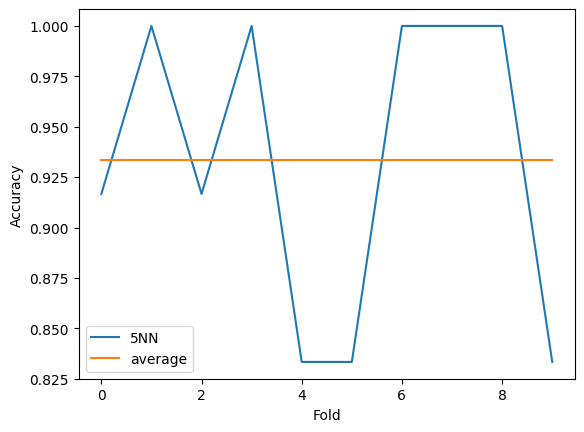

In [ ]:
plt.plot(scores_5, label = '5NN')
plt.plot([scores_5.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #4.3**

Now, use 10-Folds Cross Validation to evaluate and compare to the following models:
1. 1NN
2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)
3. 99NN


<br>

**NOTE**: There is code at the end that will visualize all of these results together.


##### **1. 1NN**

In [ ]:
knn_1 = KNeighborsClassifier(# COMPLETE THIS CODE

scores_1 = cross_val_score(# COMPLETE THIS CODE
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

##### **2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)**

In [ ]:
knn_11 = # COMPLETE THIS CODE

# COMPLETE THIS CODE

##### **3. 99NN**

In [ ]:
knn_99 = # COMPLETE THIS CODE

# COMPLETE THIS CODE

#### **Visualize the scores by running the cell below.**

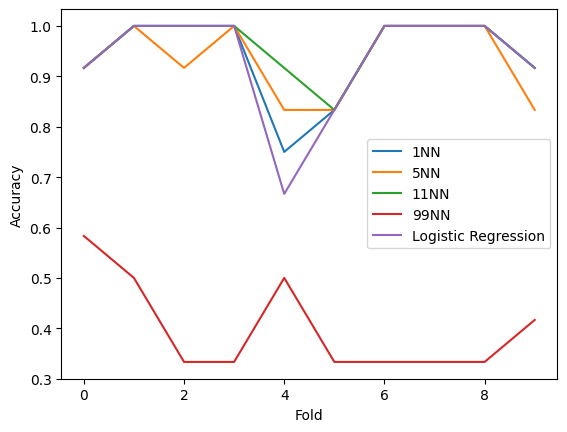

In [ ]:
plt.plot(scores_1, label = '1NN')
plt.plot(scores_5, label = '5NN')
plt.plot(scores_11, label = '11NN')
plt.plot(scores_99, label = '99NN')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #4.4**

Assuming we do not plan to try out any other models, we can safely train our final model and evaluate it on the test set. Consider the average, standard deviation, and individual scores we visualized to pick one of the models from above and:
* Train it on the entire training set.
* Evaluate it on the test set with a accuracy.


#### **Reflection questions**
Answer the following questions:

1. Which of the five models had the highest performance during cross validation?

2. Which of the five models had the lowest performance during cross validation?

3. How do the top performing model's cross validation metrics compare to the test metrics? In other words, how does this model perform in Problem #4.3 versus #4.4?

---

# End of Notebook

© 2025 The Coding School, All rights reserved